In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import os
import progressbar
import openpyxl as xl
import statsmodels.tools as tools
import scipy.stats as stats

# Wczytanie danych, dodanie wyrazu wolnego, ustalenie Y i X

### Dane:
- *GST* - Global Surface Temperature
    * Zmiana globalnej temperatury powierzchni w porównaniu z długoterminową średnią z lat 1951–1980
    * https://climate.nasa.gov/vital-signs/global-temperature/?intent=121
- *CO2*
    * Emisje dwutlenku węgla (CO₂) z paliw kopalnych i przemysłu w miliardach ton w latach 1961-2022. Zmiany sposobu użytkowania gleb (na przykład wylesianie i niszczenie lasów deszczowych) nie są uwzględnione
    * https://ourworldindata.org/co2-emissions
- *World_pop*
    * Populacja na świecie w latach 1961-2022
    * https://data.worldbank.org/indicator/SP.POP.TOTL
- *SO2*
    * emisja SO2 w tonach w latach 1961-2022
    * https://ourworldindata.org/grapher/so-emissions-by-world-region-in-million-tonnes?tab=table&time=1960..latest
- *World_meat_production*
    * globalna produkcja mięsa w tonach w latach 1961-2022
    * https://ourworldindata.org/grapher/global-meat-production?tab=table
- *Aircraft_Departures*
    * liczba lotów w latach 1961-2022
    * https://www.airlines.org/dataset/world-airlines-traffic-and-capacity/
- *N2O*
    * emisja podtlenku azotu (N2O) w tonach w latach 1961-2022
    * https://ourworldindata.org/grapher/nitrous-oxide-emissions?tab=table&time=1960..latest&mapSelect=~OWID_ASI

In [29]:
data = pd.read_excel('dane_gst.xlsx')
data.set_index(['Year'], inplace = True)
data.head()

,GST,CO2,World_pop,Aircraft_Departures,N2O,World_meat_production,SO2
Year,,,,,,,
1961,0.06,9.415042,3.062769e+09,6600.0,1321779200,60368531,80082844
1962,0.03,9.747287,3.117373e+09,6600.0,1366803800,66963905,82918614
1963,0.05,10.266772,3.184063e+09,6700.0,1411200400,71489758,86697831
1964,-0.20,10.824466,3.251253e+09,7100.0,1461375100,79587205,97074843
1965,-0.11,11.310600,3.318998e+09,7500.0,1518312400,79504511,92626291


In [30]:
data.describe()

,GST,CO2,World_pop,Aircraft_Departures,N2O,World_meat_production,SO2
count,62.000000,62.000000,6.200000e+01,62.000000,6.200000e+01,6.200000e+01,6.200000e+01
mean,0.372419,23.650744,5.456025e+09,18486.313818,2.263517e+09,1.926781e+08,1.060331e+08
std,0.330036,8.260796,1.497447e+09,9741.470156,4.410705e+08,8.995589e+07,1.971211e+07
min,-0.200000,9.415042,3.062769e+09,6600.000000,1.321779e+09,6.036853e+07,5.796448e+07
25%,0.082500,18.116493,4.154058e+09,10019.000000,1.991992e+09,1.128736e+08,9.370894e+07
50%,0.325000,22.742388,5.432810e+09,14740.000000,2.269508e+09,1.826934e+08,1.073052e+08
75%,0.637500,31.308082,6.723059e+09,27753.150805,2.606067e+09,2.682473e+08,1.216410e+08
max,1.010000,37.293836,7.989982e+09,38299.000000,2.975719e+09,3.521379e+08,1.388971e+08


In [31]:
y = data[['GST']]
x0 = pd.DataFrame(np.ones(y.shape), index = data.index, columns = ['const'])
X = pd.concat([x0, data[['CO2','World_pop','Aircraft_Departures','N2O','World_meat_production','SO2']]], axis = 1)

In [32]:
print(X["World_pop"].head(10))
print(np.diff(X["World_pop"]))

Year
1961    3.062769e+09
1962    3.117373e+09
1963    3.184063e+09
1964    3.251253e+09
1965    3.318998e+09
1966    3.389087e+09
1967    3.459014e+09
1968    3.530702e+09
1969    3.604812e+09
1970    3.680588e+09
Name: World_pop, dtype: float64
[54603617.  66689953.  67190151.  67744322.  70089667.  69927189.
 71688021.  74109237.  75776270.  78024785.  75832918.  76622240.
 76225749.  74776492.  73687480.  73200551.  74472169.  76625276.
 77546589.  79323289.  82613091.  83385495.  83115757.  84700611.
 86970918.  89318665.  90136693.  90487937.  91591777.  89249585.
 88627992.5 87654654.5 86074556.5 85652339.5 86109109.5 85851931.
 85573507.  84364273.5 83480488.5 83225170.  82416600.5 82137878.
 82962501.5 83017332.  84076834.5 84450319.5 85957629.5 85999936.
 84542206.  85530430.5 89614721.5 89498582.  88595958.5 87560795.
 87051613.  85590218.  82381296.  80397167.5 79246774.5 65045556.5
 68797173.5]


# wykres danych

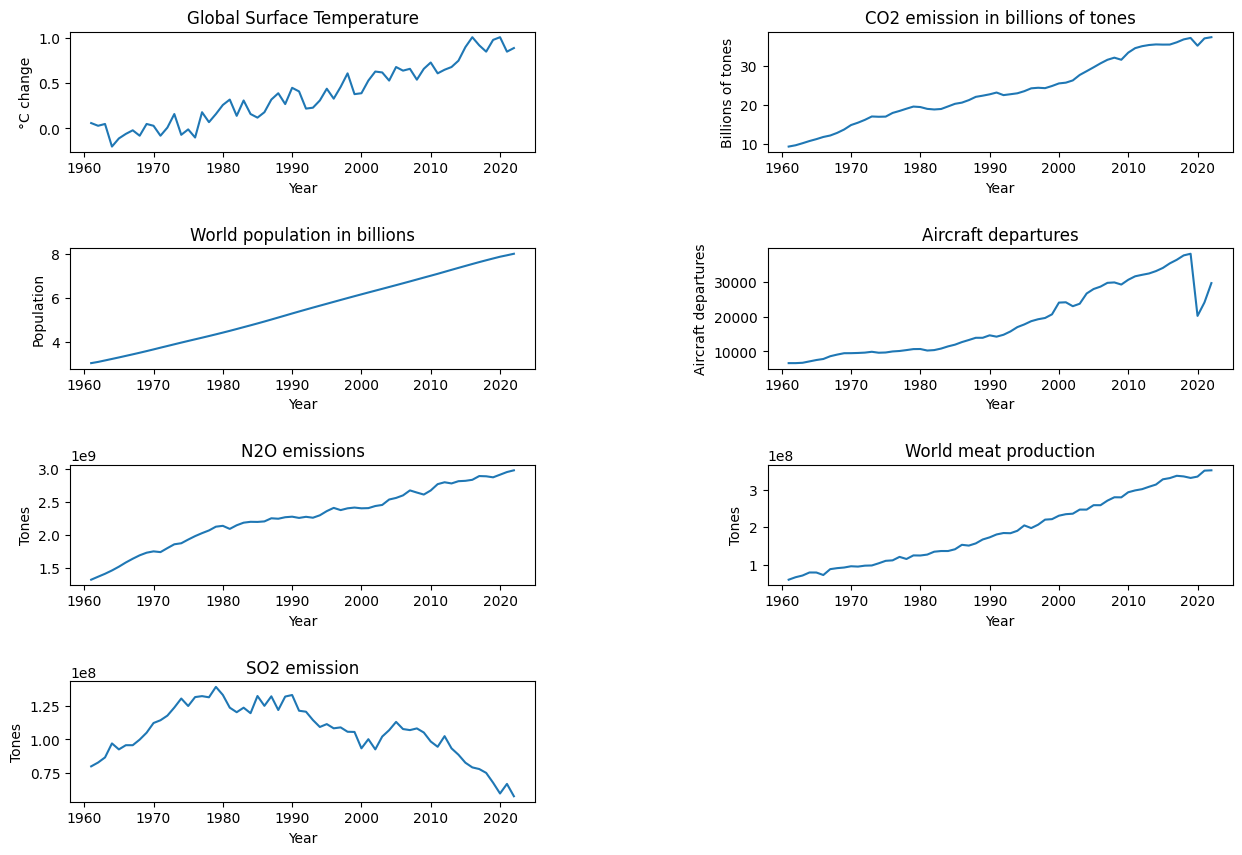

In [33]:
h = plt.figure(figsize=(15, 10))
years = X.index.to_numpy()

# Global Surface Temperature
ax1 = plt.subplot2grid((4, 2), (0, 0))
ax1.plot(years, y)
ax1.set_title('Global Surface Temperature')
ax1.set_xlabel('Year')
ax1.set_ylabel('°C change')

# CO2
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.plot(years, X.CO2)
ax2.set_title('CO2 emission in billions of tones')
ax2.set_xlabel('Year')
ax2.set_ylabel('Billions of tones')

# World Population
ax3 = plt.subplot2grid((4, 2), (1, 0)) 
ax3.plot(years, X.World_pop * 1e-9)
ax3.set_title('World population in billions')
ax3.set_xlabel('Year')
ax3.set_ylabel('Population')

# Aircraft Departures
ax4 = plt.subplot2grid((4, 2), (1, 1))
ax4.plot(years, X.Aircraft_Departures)
ax4.set_title('Aircraft departures')
ax4.set_xlabel('Year')
ax4.set_ylabel('Aircraft departures')

# NO2
ax5 = plt.subplot2grid((4, 2), (2, 0))
ax5.plot(years, X.N2O)
ax5.set_title('N2O emissions')
ax5.set_xlabel('Year')
ax5.set_ylabel('Tones')

# World Meat Production
ax6 = plt.subplot2grid((4, 2), (2, 1)) 
ax6.plot(years, X.World_meat_production)
ax6.set_title('World meat production')
ax6.set_xlabel('Year')
ax6.set_ylabel('Tones')

# SO2
ax7 = plt.subplot2grid((4, 2), (3, 0)) 
ax7.plot(years, X.SO2)
ax7.set_title('SO2 emission')
ax7.set_xlabel('Year')
ax7.set_ylabel('Tones')

plt.subplots_adjust(hspace = 0.8, wspace=0.5)
plt.show()


# Macierz korelacji (heatmap)

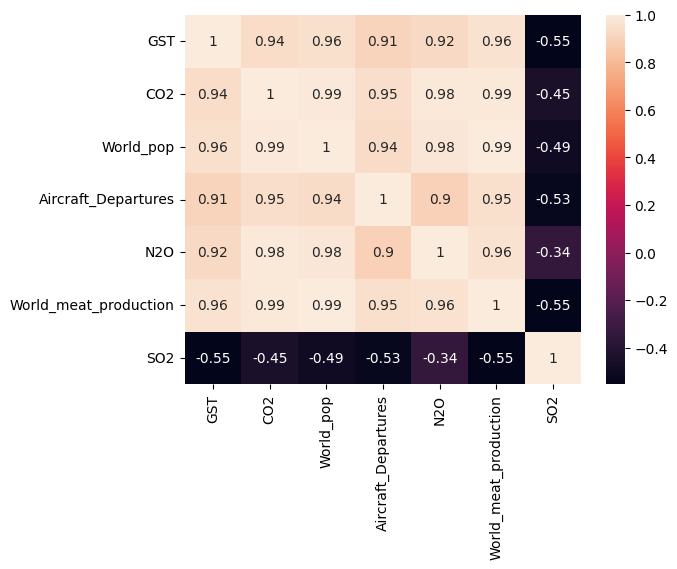

In [34]:
ax = sb.heatmap(data.corr(), annot=True)

# Histogramy i wykresy rozrzutu

<function matplotlib.pyplot.show(close=None, block=None)>

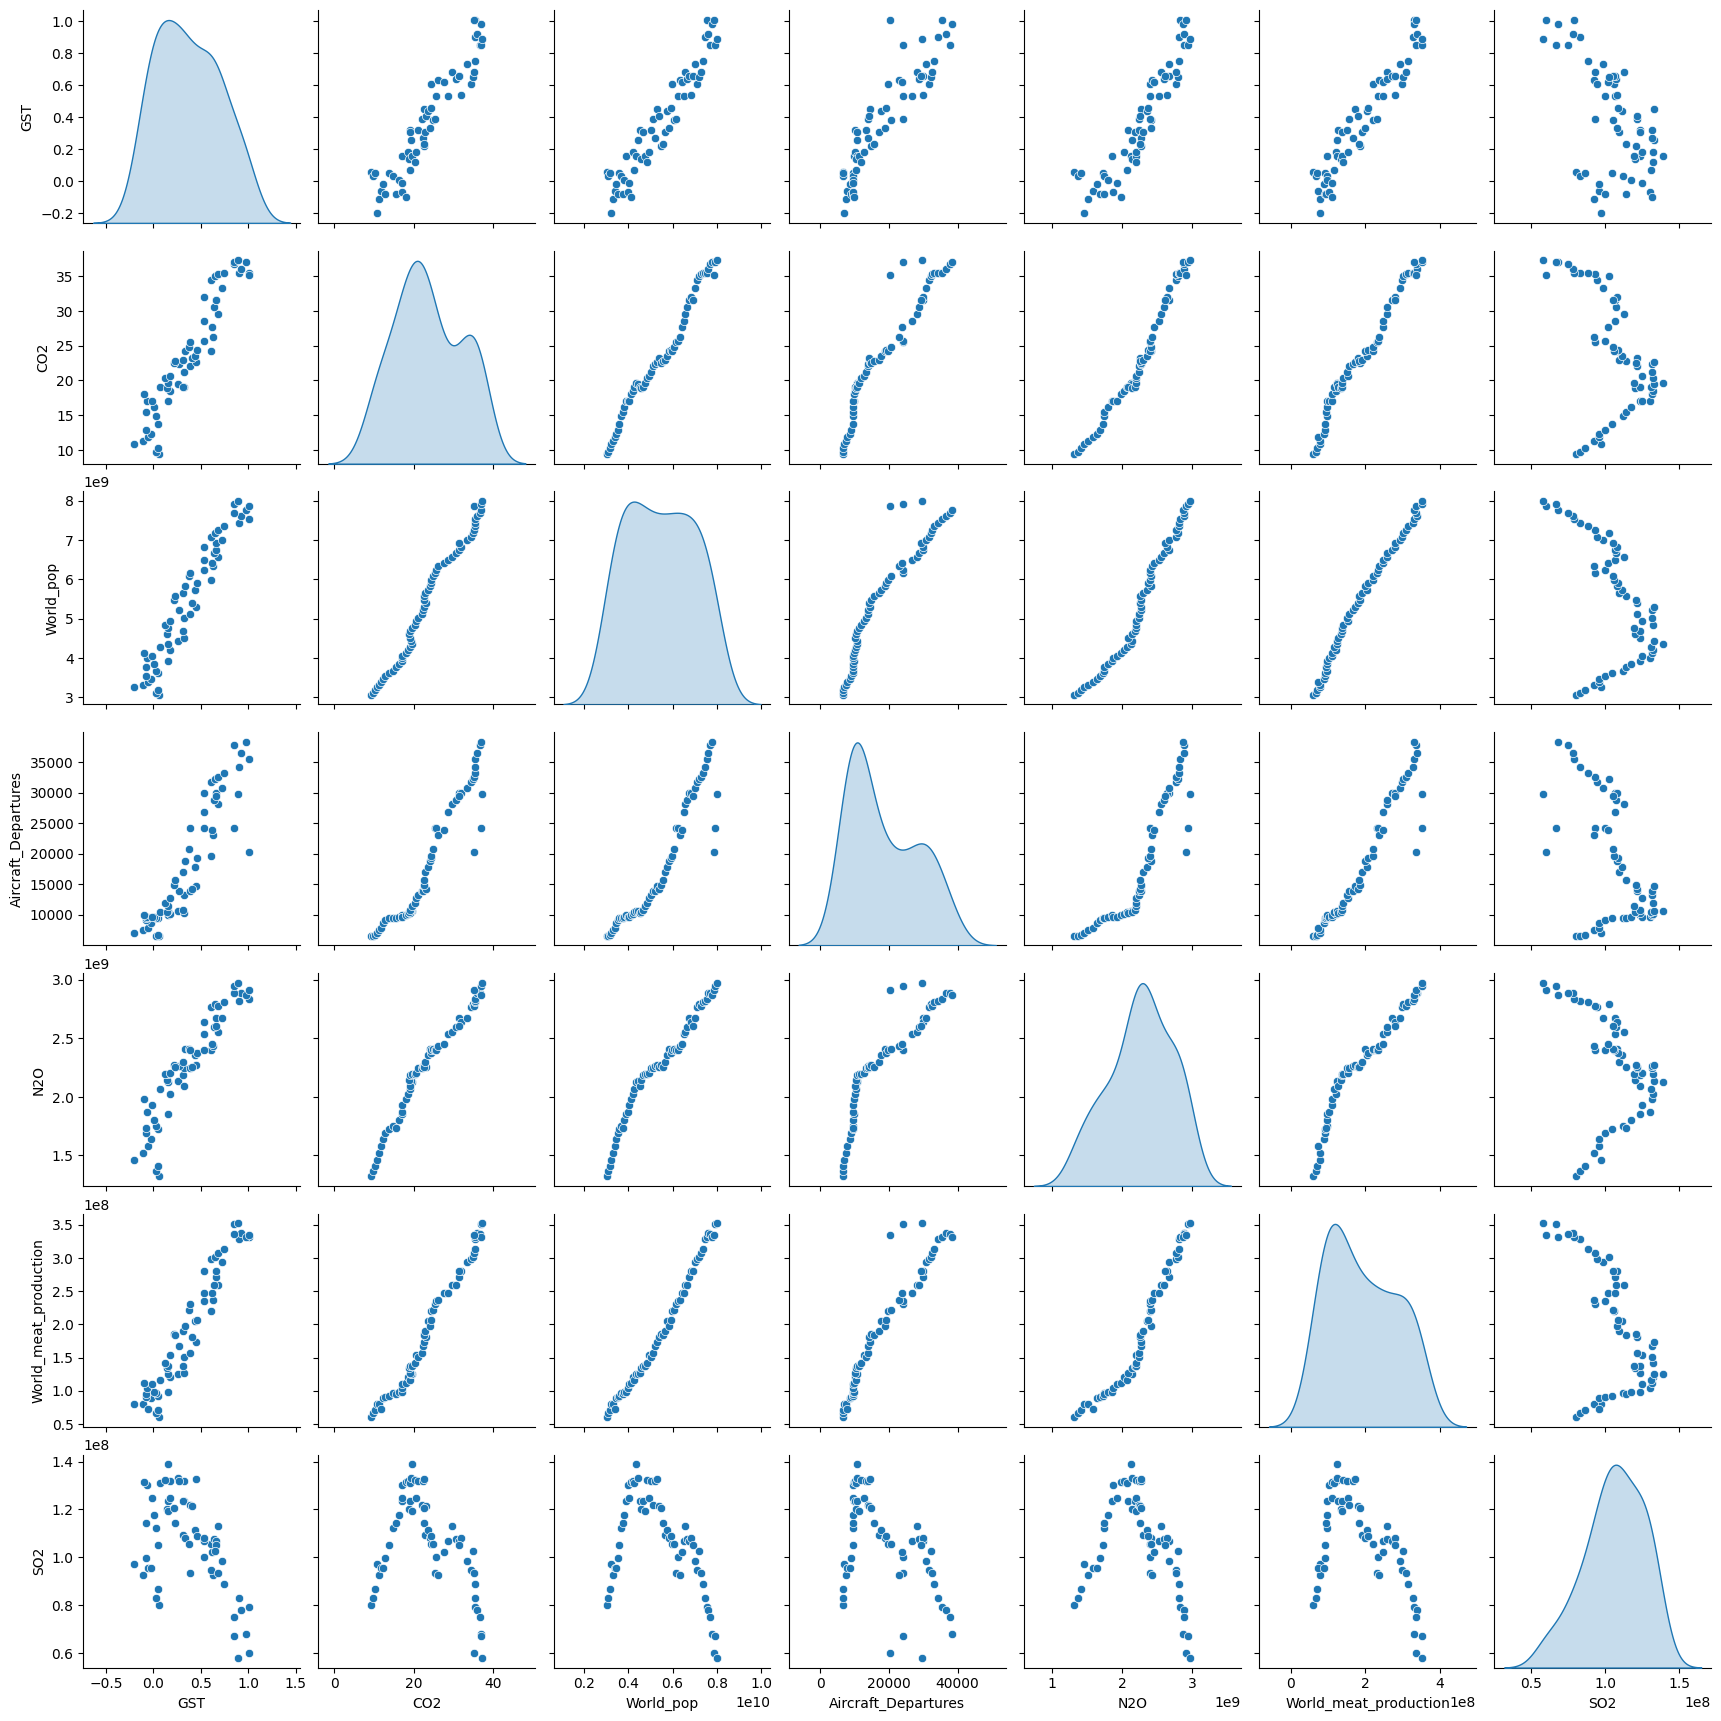

In [35]:
sb.pairplot(data, kind = 'scatter', diag_kind = 'kde')
plt.show

# Testy stacjonarności

In [36]:
from statsmodels.tsa.stattools import adfuller, kpss

In [37]:
results = []

for col in data.columns:
    series = data[col].dropna()
    
    adf_stat, adf_p, *_ = adfuller(series)
    try:
        kpss_stat, kpss_p, *_ = kpss(series, regression = 'c', nlags = 'auto')
    except:
        kpss_stat, kpss_p = float('nan'), float('nan')
    
    results.append({
        'Variable': col,
        'ADF Statistic': adf_stat,
        'ADF p-value': adf_p,
        'ADF - stacjonarny': adf_p < 0.05,
        'KPSS Statistic': kpss_stat,
        'KPSS p-value': kpss_p,
        'KPSS - stacjonarny': kpss_p >= 0.05
    })

summary = pd.DataFrame(results)
print(summary)

                Variable  ADF Statistic  ADF p-value  ADF - stacjonarny  \
0                    GST       1.459658     0.997369              False   
1                    CO2      -0.501751     0.891674              False   
2              World_pop      -1.211103     0.668801              False   
3    Aircraft_Departures      -0.958032     0.768262              False   
4                    N2O      -2.345564     0.157693              False   
5  World_meat_production       1.965516     0.998626              False   
6                    SO2       0.087018     0.965164              False   

   KPSS Statistic  KPSS p-value  KPSS - stacjonarny  
0        1.281600      0.010000               False  
1        1.113024      0.010000               False  
2        1.139344      0.010000               False  
3        1.042895      0.010000               False  
4        1.112319      0.010000               False  
5        1.126328      0.010000               False  
6        0.556806    

C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\137747982.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(series, regression = 'c', nlags = 'auto')
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\137747982.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(series, regression = 'c', nlags = 'auto')
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\137747982.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(series, regression = 'c', nlags = 'auto')
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\137747982.py:8: Inte

- wszystkie szeregi są niestacjonarne. Przechodzimy na przyrosty.

In [38]:
data_diff = data.diff().dropna()

results = []

for col in data_diff.columns:
    series = data_diff[col].dropna()
    
    adf_stat, adf_p, *_ = adfuller(series)
    try:
        kpss_stat, kpss_p, *_ = kpss(series, regression = 'c', nlags = 'auto')
    except:
        kpss_stat, kpss_p = float('nan'), float('nan')
    
    results.append({
        'Variable': col,
        'ADF Statistic': adf_stat,
        'ADF p-value': adf_p,
        'ADF - stacjonarny': adf_p < 0.05,
        'KPSS Statistic': kpss_stat,
        'KPSS p-value': kpss_p,
        'KPSS - stacjonarny': kpss_p >= 0.05
    })

summary = pd.DataFrame(results)
print(summary)
# World_pop nadal niestacjonarny

                Variable  ADF Statistic   ADF p-value  ADF - stacjonarny  \
0                    GST      -4.451296  2.405680e-04               True   
1                    CO2      -7.690579  1.422851e-11               True   
2              World_pop      -1.341680  6.098945e-01              False   
3    Aircraft_Departures      -7.425237  6.575164e-11               True   
4                    N2O      -6.416739  1.833350e-08               True   
5  World_meat_production      -7.453037  5.605096e-11               True   
6                    SO2      -9.175631  2.324377e-15               True   

   KPSS Statistic  KPSS p-value  KPSS - stacjonarny  
0        0.466239      0.049270               False  
1        0.080478      0.100000                True  
2        0.627225      0.020161               False  
3        0.119261      0.100000                True  
4        0.379862      0.085835                True  
5        0.299084      0.100000                True  
6        0.75

C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\2056182702.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(series, regression = 'c', nlags = 'auto')
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\2056182702.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(series, regression = 'c', nlags = 'auto')
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\2056182702.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(series, regression = 'c', nlags = 'auto')
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\2056182702.py:

In [39]:
from pmdarima.arima.utils import ndiffs

In [40]:
# sprawdzamy, ile przyrostów potrzeba dla World_pop, bo dla 1 nadal niestacjonarny
d = ndiffs(data['World_pop'], test = 'adf')
print(f"Potrzebne przyrosty: {d}")

Potrzebne przyrosty: 2


C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: '

# Testy autoregresji

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

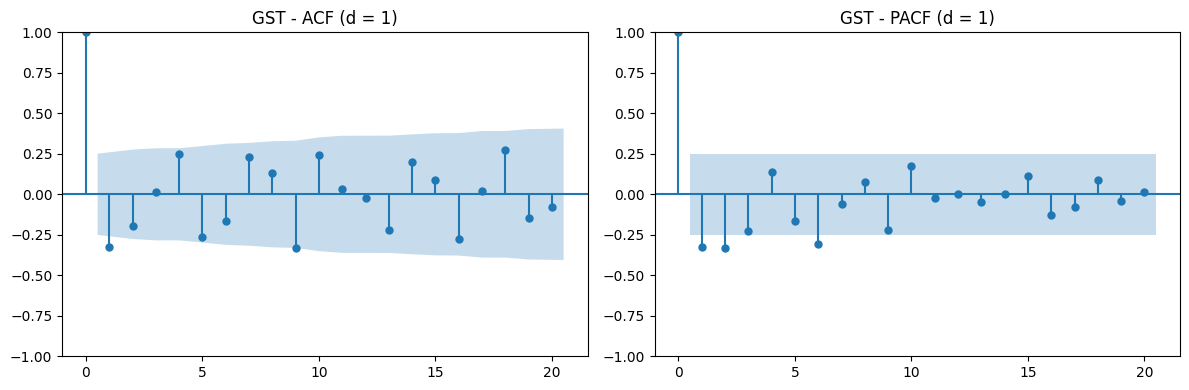

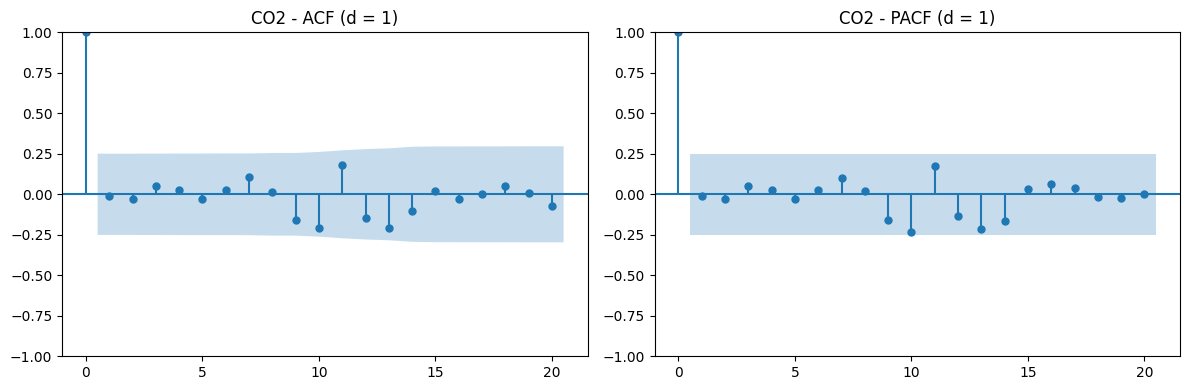

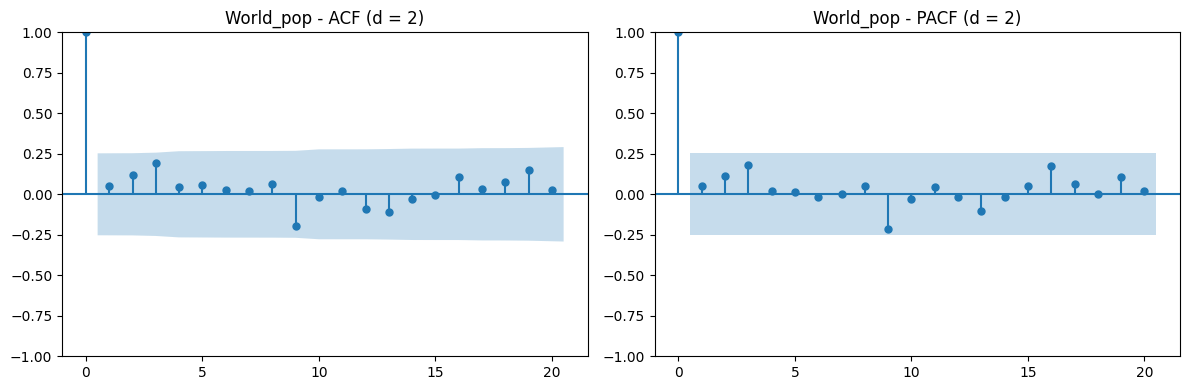

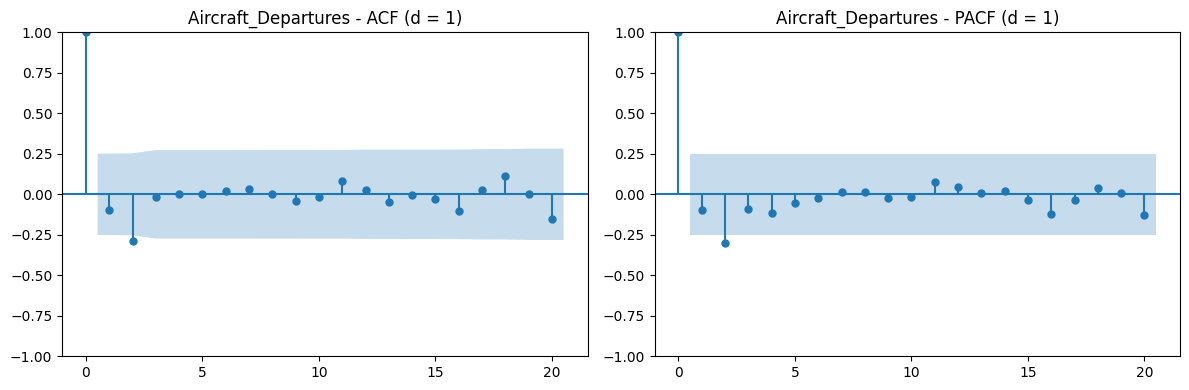

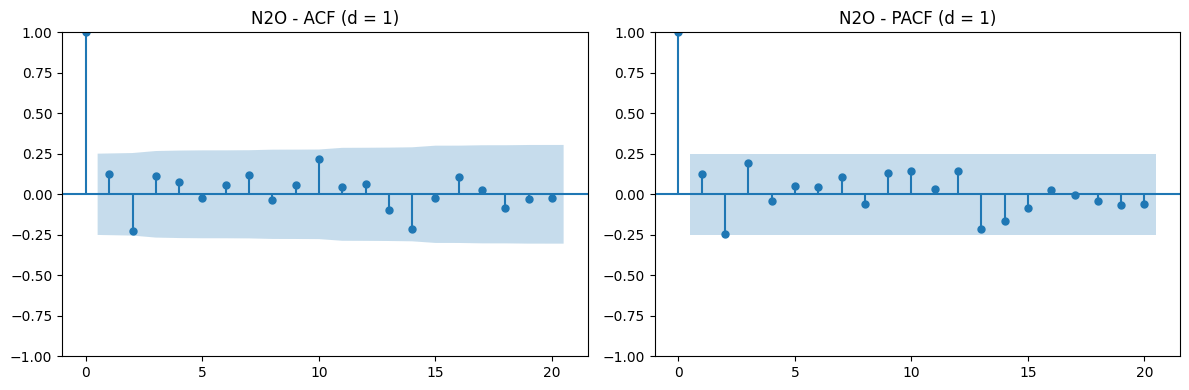

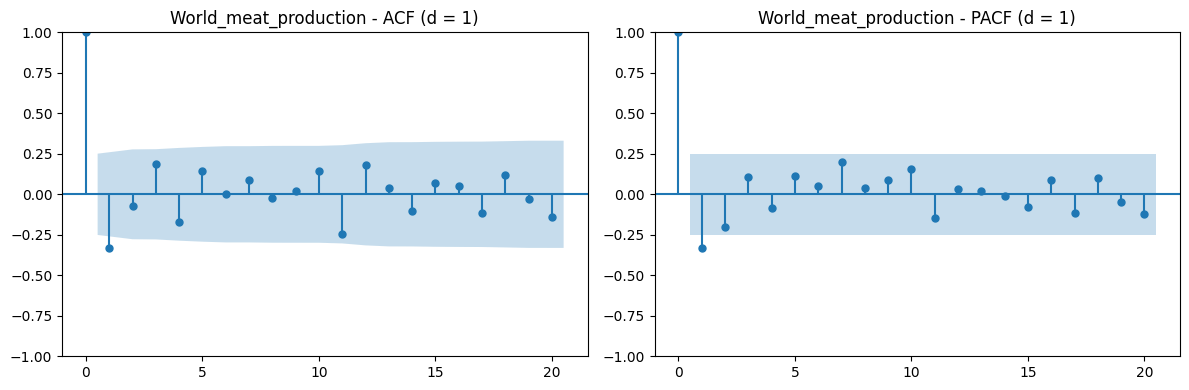

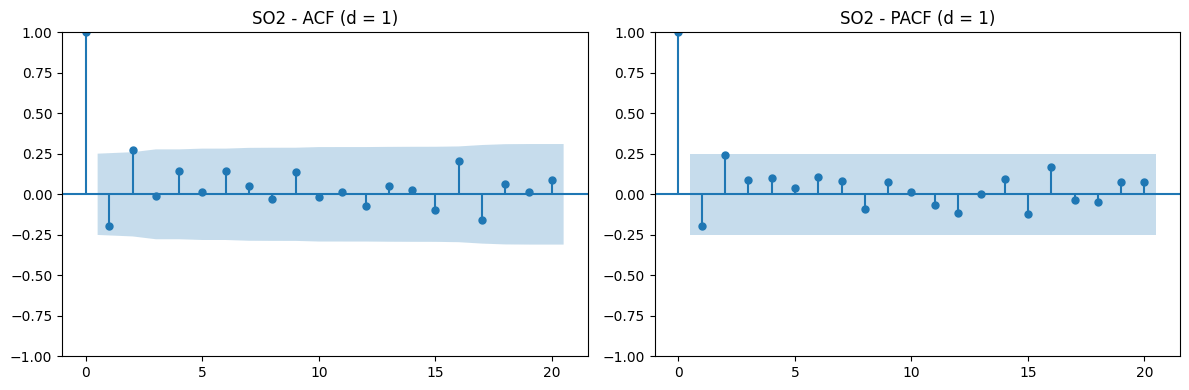

In [42]:
diffs = {
    'GST': 1,
    'CO2': 1,
    'World_pop': 2,
    'Aircraft_Departures': 1,
    'N2O': 1,
    'World_meat_production': 1,
    'SO2': 1    
}

for var, d in diffs.items():
    series = data[var].copy()
    for i in range(d):
        series = series.diff()
    series = series.dropna()
    
    fig, axs = plt.subplots(1, 2, figsize = (12, 4))
    
    plot_acf(series, lags = 20, ax = axs[0])
    axs[0].set_title(f"{var} - ACF (d = {d})")
    
    plot_pacf(series, lags = 20, ax = axs[1])
    axs[1].set_title(f"{var} - PACF (d = {d})")
    
    plt.tight_layout()
    plt.show()
    
# GST - AR(2)
# CO2 - brak AR
# World_pop - brak AR
# Aircraft_departures - AR(2)
# N2O - AR(2)
# meat - AR(1)
# SO2 - brak AR

czyli dla GST prawdopodobnie ARIMA (2, 1, 0)

# Budowa modelu ARIMA(2,1,0)

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
y_endog = data_diff['GST']
X_exog = data_diff[['CO2', 'World_pop', 'Aircraft_Departures', 'N2O', 'World_meat_production', 'SO2']]

model = ARIMA(endog = y_endog, exog = X_exog, order = (2, 0, 0))   #2, 0, 0 - bo GST już jest zróżnicowane
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   61
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  51.972
Date:                Tue, 10 Jun 2025   AIC                            -83.945
Time:                        13:21:28   BIC                            -62.836
Sample:                             0   HQIC                           -75.672
                                 - 61                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0805   1.17e-05  -6890.081      0.000      -0.081      -0.080
CO2                      -0.0223   7.66e-05   -290.636      0.000      -0.022      -0.022
World_po

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\b

- zmienne: Aircraft_Departures, N2O, World_meat_production, SO2 - nieistotne
- Ljung-Box = 0.26, p = 0.61 -> brak autokorelacji reszt
- Jarque-Bera - p = 0.65 -> reszty mogą być normalne

# Model ARIMA(2,1,1)

In [45]:
y_endog = data_diff['GST']
X_exog = data_diff[['CO2', 'World_pop', 'Aircraft_Departures', 'N2O', 'World_meat_production', 'SO2']]

model = ARIMA(endog = y_endog, exog = X_exog, order = (2, 0, 1))   #2, 0, 1 - bo GST już jest zróżnicowane
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   61
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  53.027
Date:                Tue, 10 Jun 2025   AIC                            -84.053
Time:                        13:21:28   BIC                            -60.834
Sample:                             0   HQIC                           -74.953
                                 - 61                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0805   3.69e-10  -2.18e+08      0.000      -0.080      -0.080
CO2                      -0.0223   1.48e-09  -1.51e+07      0.000      -0.022      -0.022
World_po

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\b

In [46]:
from statsmodels.stats.diagnostic import acorr_ljungbox

resid = results.resid
ljung = acorr_ljungbox(resid, lags=[1], return_df=True)
print(ljung)

    lb_stat  lb_pvalue
1  0.025037   0.874276


- AIC - lepsze
- BIC - gorsze
- Log-Likelihood - lepsze
- reszty normalne
- brak autokorelacji
- MA(1) - istotna
- kolinearność lub za dużo zmiennych

# Model ARIMA(2,1,1) dla GST, CO2, World_pop

In [47]:
y_endog = data_diff['GST']
X_exog = data_diff[['CO2', 'World_pop']]

model = ARIMA(endog = y_endog, exog = X_exog, order = (2, 0, 1))   #2, 0, 1 - bo GST już jest zróżnicowane
results = model.fit()
print(results.summary())

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\b

                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   61
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  53.777
Date:                Tue, 10 Jun 2025   AIC                            -93.554
Time:                        13:21:28   BIC                            -78.778
Sample:                             0   HQIC                           -87.763
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1014    6.8e-19  -1.49e+17      0.000      -0.101      -0.101
CO2           -0.0236   2.71e-19  -8.71e+16      0.000      -0.024      -0.024
World_pop   1.558e-09   5.56e-11     28.014      0.0

- AIC - lepszy
- normalność i brak autokorelacji reszt
- brak sezonowości
- wszystkie współczynniki statystycznie istotne
- Model dopasowuje się dobrze, ale parametry mają podejrzanie niską wariancję (kolinearność? Wina skali zmiennych?). Mimo to, spełnia warunki diagnostyczne i ma najlepszy AIC.

# Model ARIMA(2, 1, 1) dla wszystkich zmiennych, ale World_pop, N2O, World_meat_production, SO2 - logarytmy naturalne

In [48]:
data_log = data.copy()

cols_to_log = ['World_pop', 'N2O', 'World_meat_production', 'SO2']

for col in cols_to_log:
    data_log[col] = np.log(data_log[col])
    
data_log_diff = data_log.diff().dropna()

In [49]:
y_endog = data_diff['GST']
X_exog = data_log_diff[['CO2', 'World_pop', 'Aircraft_Departures', 'N2O', 'World_meat_production', 'SO2']]

model = ARIMA(endog = y_endog, exog = X_exog, order = (2, 0, 1))
results = model.fit()
print(results.summary())

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   61
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  53.330
Date:                Tue, 10 Jun 2025   AIC                            -84.661
Time:                        13:21:28   BIC                            -61.441
Sample:                             0   HQIC                           -75.561
                                 - 61                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0012      0.060     -0.020      0.984      -0.118       0.116
CO2                      -0.0141      0.037     -0.378      0.705      -0.087       0.059
World_po

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- wszystkie zmienne niezależne nie są istotne statystycznie
- tylko MA(1) istotne

# Model ARIMA(0, 1, 1) z danymi j.w.

In [50]:
model = ARIMA(endog = y_endog, exog = X_exog, order = (0, 0, 1))
results = model.fit()
print(results.summary())

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   61
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  51.350
Date:                Tue, 10 Jun 2025   AIC                            -84.700
Time:                        13:21:28   BIC                            -65.702
Sample:                             0   HQIC                           -77.254
                                 - 61                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0012      0.065     -0.018      0.986      -0.129       0.127
CO2                      -0.0141      0.037     -0.381      0.703      -0.086       0.058
World_po

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Model ARIMA(1, 1, 0) z danymi j.w.

In [51]:
model = ARIMA(endog = y_endog, exog = X_exog, order = (1, 0, 0))
results = model.fit()
print(results.summary())

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   61
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  48.497
Date:                Tue, 10 Jun 2025   AIC                            -78.994
Time:                        13:21:28   BIC                            -59.996
Sample:                             0   HQIC                           -71.548
                                 - 61                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0012      0.084     -0.014      0.989      -0.165       0.163
CO2                      -0.0141      0.040     -0.349      0.727      -0.093       0.065
World_po

# Model ARIMA(1, 1, 1) z danymi j.w.

In [52]:
model = ARIMA(endog = y_endog, exog = X_exog, order = (1, 0, 1))
results = model.fit()
print(results.summary())

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   61
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  54.703
Date:                Tue, 10 Jun 2025   AIC                            -89.406
Time:                        13:21:28   BIC                            -68.298
Sample:                             0   HQIC                           -81.134
                                 - 61                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0007      0.063      0.012      0.991      -0.123       0.125
CO2                      -0.0130      0.040     -0.322      0.747      -0.092       0.066
World_po

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Model ARIMA(0, 1, 2) z danymi j.w.

In [53]:
model = ARIMA(endog = y_endog, exog = X_exog, order = (0, 0, 2))
results = model.fit()
print(results.summary())

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   61
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  52.337
Date:                Tue, 10 Jun 2025   AIC                            -84.675
Time:                        13:21:28   BIC                            -63.566
Sample:                             0   HQIC                           -76.402
                                 - 61                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0012      0.073     -0.016      0.987      -0.145       0.143
CO2                      -0.0141      0.044     -0.324      0.746      -0.099       0.071
World_po

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- ARIMA(1, 1, 1) najlepszy, ale żadna zmienna nie jest istotna.

# ARIMA(1, 0, 1) ale na oryginalnych danych, nie na przyrostach - N2O, produkcja mięsa

In [54]:
y_endog = data['GST']
X_exog = data[['N2O', 'World_meat_production']]

model = ARIMA(endog = y_endog, exog = X_exog, order = (1, 0, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   62
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  59.214
Date:                Tue, 10 Jun 2025   AIC                           -106.428
Time:                        13:21:28   BIC                            -93.665
Sample:                             0   HQIC                          -101.417
                                 - 62                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3462   7.24e-19  -4.78e+17      0.000      -0.346      -0.346
N2O                    3.066e-11   1.89e-11      1.623      0.105   -6.37e-12    6.77e-11
World_me

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\b

- drugi najlepszy model

# ARIMA(1, 0, 1) na oryginalnych danych - CO2, populacja, SO2

In [55]:
y_endog = data['GST']
X_exog = data[['CO2', 'World_pop', 'SO2']]

model = ARIMA(endog = y_endog, exog = X_exog, order = (1, 0, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    GST   No. Observations:                   62
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  61.697
Date:                Tue, 10 Jun 2025   AIC                           -109.394
Time:                        13:21:28   BIC                            -94.504
Sample:                             0   HQIC                          -103.547
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4807   1.67e-18  -2.88e+17      0.000      -0.481      -0.481
CO2            0.0050   8.42e-18   5.99e+14      0.000       0.005       0.005
World_pop    1.71e-10   6.07e-12     28.185      0.0

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\b

- najlepszy model

# Podsumowanie wybranych modeli
- najlepsze modele to ARIMA(1, 0, 1) dla CO2, populacji i SO2, oraz ARIMA(1, 0, 1) dla N2O i produkcji mięsa
- Oba modele uzyskały bardzo dobre dopasowanie statystyczne (AIC: –109.4 oraz –106.4) i wykazały istotność wszystkich predyktorów. Porównanie sugeruje, że zarówno wzrost populacji i emisje przemysłowe, jak i intensyfikacja produkcji żywności przyczyniają się do zmian klimatycznych.

### Model ARIMA(1, 0, 1) z egzogenicznymi zmiennymi CO2, populacja, SO2
Wszystkie zmienne okazały się istotne statystycznie (p-value ~ 0), co wskazuje na silny związek między nimi a temperaturą. Dodatni współczynnik przy CO2 oznacza, że wzrost jego poziomu skutkuje wzrostem GST. Populacja również dodatnio wpływa na temperaturę, co może odzwierciedlać skumulowany wpływ działalności ludzkiej. Z kolei SO2 ma wpływ ujemny, co można interpretować jako efekt znanego mechanizmu chłodzącego działania aerozoli siarkowych.

AR i MA są istotne statystycznie, co pokazuje, że zmienna GST jest częściowo powiązana z samą sobą w czasie - przeszłe wartości i zakłócenia mają wpływ na jej obecne poziomy. AR ma współczynnik ujemny, co oznacza, że zmienna zależna wykazuje negatywną zależność od swojej przeszłości - wzrost w jednym okresie może prowadzić do spadku w kolejnym. Jednocześnie składnik MA jest dodatni, co wskazuje na silny efekt losowego szumu z poprzedniego okresu na bieżącą wartość. 

AIC = -109 i BIC = -94.5 to najniższe spośród testowanych modeli, co oznacza najlepsze dopasowanie modelu. Test Ljunga-Boxa (p ~ 0.86) nie wykazuje autokorelacji reszt. Test Jarque-Bera (p ~ 0.21) wskazuje, że rozkład reszt nie odbiega istotnie od normalnego. Test na heteroskedastyczność (p ~ 0.23) nie daje podstaw do odrzucenia homoskedastyczności, czyli wariancja reszt jest stała. 

### Model ARIMA(1, 0, 1) z egzogenicznymi zmiennymi N2O, produkcja mięsa
Wśród zmiennych egzogenicznych najsilniejszy wpływ wykazała światowa produkcja mięsa, której współczynnik był dodatni i bardzo istotny statystycznie (p-value < 0.001), co pokazuje, że wzrost produkcji mięsa istotnie wpływa na wzrost globalnej temperatury. Jest to zgodne z przewidywaniami dotyczącymi wpływu sektora hodowlanego na emisję gazów cieplarnianych. Druga zmienna, N2O, również miała dodatni współczynnik, a jej istotność statystyczna wyniosła ~ 0.105. Choć nie spełnia ona progu 0.05, to przy przyjęciu poziomu istotności 0.1 można ją interpretować jako zmienną o potencjalnym wpływie - emisje podtlenku azotu, będące silnym czynnikiem cieplarnianym, wykazują związek z ociepleniem klimatu.

Parametry procesu dynamicznego wskazują na obecność tłumionego efektu przeszłych wartości GST. Zarówno AR, jak i MA, są istotne statystycznie. AR ma współczynnik ujemny, co oznacza, że zmienna zależna wykazuje negatywną zależność od swojej przeszłości - wzrost w jednym okresie może prowadzić do spadku w kolejnym. Jednocześnie składnik MA jest dodatni, co wskazuje na silny efekt losowego szumu z poprzedniego okresu na bieżącą wartość. 

Model uzyskał bardzo dobre dopasowanie pod względem AIC (-106.4) i BIC (-93.7). Nie zaobserwowano istotnych problemów statystycznych. W teście Ljunga-Boxa dla opóźnienia 1 uzyskano statystykę = 0.00 p-value ~ 1.00, co wskazuje na brak autokorelacji reszt. Rozkład reszt okazał się zgodny z rozkładem normalnym (JB = 1.85, p-value = 0.4), a test heteroskedastyczności (= 0.54, p-value = 0.17) nie wykazał niestabilności wariancji w czasie.

# Próba predykcji kiedy i z jakim prawdopodobieństwem średni przyrost temperatury przekroczy 1.5 za 25 lat (model ARIMA(2,1,1) dla GST, CO2, World_pop)

1. Regresja, w celu prognozy zmiennych niezależnych
2. Prognoza zmiennych niezależnych
3. Wykonanie predykcji GST
4. Sprawdzenie, kiedy GST przekroczy 1,5 stopnia Celsjusza i oszacowanie niepewności

### 1. Dopasowanie modeli regresji

In [74]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# CO2

x = np.arange(1961, 1961 + len(data['CO2']))
y = data['CO2'].values

# liniowa
def lin(x, a, b): return a * x + b
param_linear, _ = curve_fit(lin, x, y)
y_lin = lin(x, *param_linear)

# wykładnicza
def expo(x, a, b, c): return a * np.exp(b * x) + c
param_exp, _ = curve_fit(expo, x, y, bounds = ([0, -np.inf, -np.inf], [np.inf, 0.1, np.inf]), maxfev = 10000)
y_exp = expo(x, *param_exp)

# kwadratowa
def quad(x, a, b, c): return a * x**2 + b * x + c
param_quad, _ = curve_fit(quad, x, y)
y_quad = quad(x, *param_quad)

# sześcienna
def cub(x, a, b, c, d): return a * x**3 + b * x**2 + c * x + d
param_cub, _ = curve_fit(cub, x, y)
y_cub = cub(x, *param_cub)

# logarytmiczna
def logarytmic(x, a, b): return a * np.log(x) + b
param_log, _ = curve_fit(logarytmic, x, y)
y_log = logarytmic(x, *param_log)

# porównanie
def por(true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, r2

print("Liniowa: ", por(y, y_lin), "\nWykładnicza: ", por(y, y_exp), "\nKwadratowa: ", por(y, y_quad), "\nSześcienna: ", por(y, y_cub), "\nLogarytmiczna: ", por(y, y_log))

# dla CO2 najlepsza kwadratowa

Liniowa:  (1.4317301651108967, 0.9786754804117576) 
Wykładnicza:  (67.14009003514887, 0.0) 
Kwadratowa:  (1.2911324923946141, 0.9807695746055942) 
Sześcienna:  (501814180359.00854, -7474136243.0279875) 
Logarytmiczna:  (1.457080484353038, 0.978297906904947)


In [76]:
# World_pop

x = np.arange(1961, 1961 + len(data['World_pop']))
y = data['World_pop'].values

# liniowa
def lin(x, a, b): return a * x + b
param_linear, _ = curve_fit(lin, x, y)
y_lin = lin(x, *param_linear)

# wykładnicza
def expo(x, a, b, c): return a * np.exp(b * x) + c
param_exp, _ = curve_fit(expo, x, y, bounds = ([0, -np.inf, -np.inf], [np.inf, 0.1, np.inf]), maxfev = 10000)
y_exp = expo(x, *param_exp)

# kwadratowa
def quad(x, a, b, c): return a * x**2 + b * x + c
param_quad, _ = curve_fit(quad, x, y)
y_quad = quad(x, *param_quad)

# sześcienna
def cub(x, a, b, c, d): return a * x**3 + b * x**2 + c * x + d
param_cub, _ = curve_fit(cub, x, y)
y_cub = cub(x, *param_cub)

# logarytmiczna
def logarytmic(x, a, b): return a * np.log(x) + b
param_log, _ = curve_fit(logarytmic, x, y)
y_log = logarytmic(x, *param_log)

# porównanie
def por(true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, r2

print("Liniowa: ", por(y, y_lin), "\nWykładnicza: ", por(y, y_exp), "\nKwadratowa: ", por(y, y_quad), "\nSześcienna: ", por(y, y_cub), "\nLogarytmiczna: ", por(y, y_log))

# dla World_pop najlepsza kwadratowa

Liniowa:  (1877339910432351.5, 0.9991490546815908) 
Wykładnicza:  (3.1974388035774448e+19, -13.493089747278333) 
Kwadratowa:  (1213339829626937.0, 0.9994500272210041) 
Sześcienna:  (1.182228268083035e+23, -53586.078420160455) 
Logarytmiczna:  (2326492035957429.0, 0.9989454666705198)


C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\1855013312.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  param_quad, _ = curve_fit(quad, x, y)
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\1855013312.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  param_cub, _ = curve_fit(cub, x, y)


### 2. Prognoza zmiennych niezależnych

In [60]:
import matplotlib.ticker as ticker

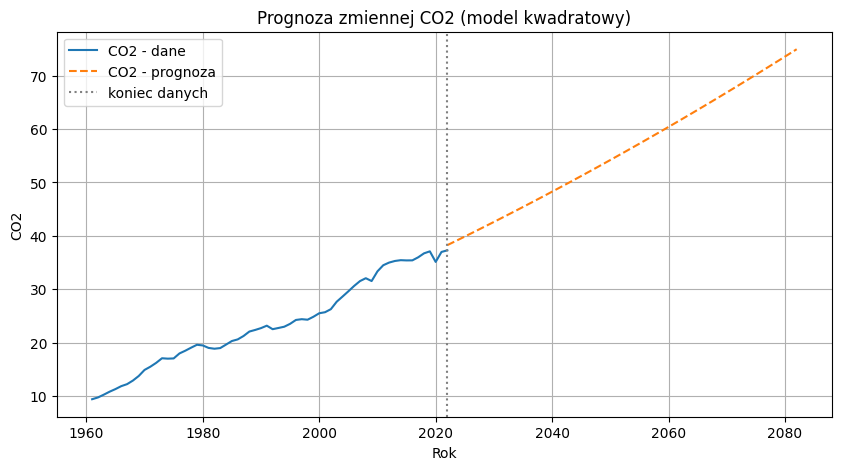

C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\1056985529.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(quad, years, y)


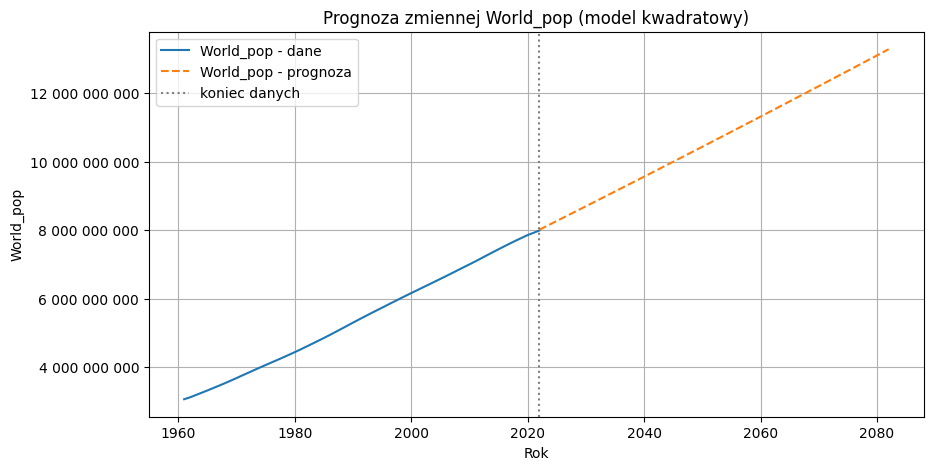

In [84]:
data_dict = {
    "CO2": data['CO2'],
    "World_pop": data['World_pop']
}

def quad(x, a, b, c): return a * x**2 + b * x + c

start_year = 1961
n_years = len(next(iter(data_dict.values())))
n_future_years = 60

years = np.arange(start_year, start_year + n_years)
years_future = np.arange(start_year + n_years - 1, start_year + n_years + n_future_years)

# prognozy
forecast_dict = {}

for name, y in data_dict.items():
    
    params, _ = curve_fit(quad, years, y)
    y_future = quad(years_future, *params)
    forecast_dict[name] = y_future
    
    # wykres
    plt.figure(figsize = (10, 5))
    plt.plot(years, y, label = f'{name} - dane')
    plt.plot(years_future, y_future, '--', label = f'{name} - prognoza')
    plt.axvline(x = years[-1], color = 'gray', linestyle = ':', label = 'koniec danych')
    plt.xlabel('Rok')
    plt.ylabel(name)
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
    plt.title(f'Prognoza zmiennej {name} (model kwadratowy)')
    plt.legend()
    plt.grid(True)
    plt.show()

### 3. Predykcja GST

In [86]:
n_obs = len(y)
n_forecast = 60

X_future = pd.DataFrame({
    'CO2': forecast_dict['CO2'][:n_forecast],
    'World_pop': forecast_dict['World_pop'][:n_forecast]
})

y = data['GST']

model = ARIMA(endog = y, exog = X[['CO2', 'World_pop']], order = (2, 1, 1))
fitted = model.fit()

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\b

In [87]:
forecast_result = fitted.get_forecast(steps = n_forecast, exog = X_future)
predicted_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


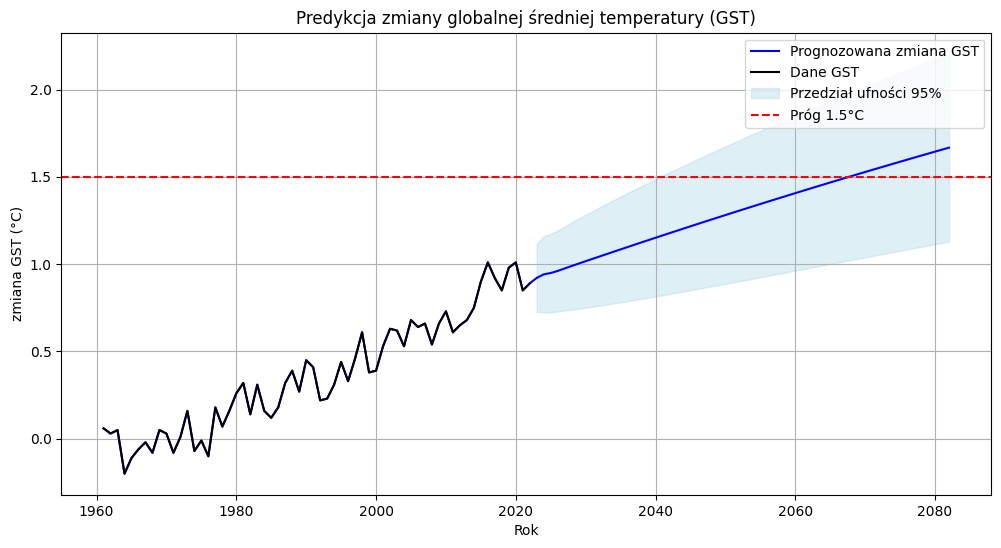

In [88]:
years_full = np.arange(start_year, start_year + n_obs + n_forecast)

full_series = np.concatenate([y, predicted_mean])
lower = np.concatenate([np.full(n_obs, np.nan), conf_int.iloc[:, 0]])
upper = np.concatenate([np.full(n_obs, np.nan), conf_int.iloc[:, 1]])

plt.figure(figsize = (12, 6))
plt.plot(years_full, full_series, label = 'Prognozowana zmiana GST', color = 'blue')
plt.plot(years[:n_obs], y, label = 'Dane GST', color = 'black')
plt.fill_between(years_full, lower, upper, color = 'lightblue', alpha = 0.4, label = 'Przedział ufności 95%')
plt.axhline(1.5, color = 'red', linestyle = '--', label = 'Próg 1.5°C')
plt.xlabel('Rok')
plt.ylabel('zmiana GST (°C)')
plt.title('Predykcja zmiany globalnej średniej temperatury (GST)')
plt.legend()
plt.grid(True)
plt.show()

### 4. Kiedy GST przekroczy 1,5 stopnia Celsjusza

In [89]:
crossing = np.where(full_series > 1.5)[0]
if len(crossing) > 0:
    year_crossed = years_full[crossing[0]]
    print(f'Prognozowane przekroczenie 1.5°C w roku: {year_crossed}')
else:
    print('W prognozowanym okresie nie przekroczono 1.5°C')

Prognozowane przekroczenie 1.5°C w roku: 2068


# Próba predykcji kiedy i z jakim prawdopodobieństwem średni przyrost temperatury przekroczy 1.5 za 25 lat (model ARIMA(1, 0, 1) - CO2, populacja, SO2)

1. Regresja, w celu prognozy zmiennych niezależnych
2. Prognoza zmiennych niezależnych
3. Wykonanie predykcji GST
4. Sprawdzenie, kiedy GST przekroczy 1,5 stopnia Celsjusza i oszacowanie niepewności

### 1. Dopasowanie modeli regresji

In [57]:
# CO2

x = np.arange(1961, 1961 + len(data['CO2']))
y = data['CO2'].values

# liniowa
def lin(x, a, b): return a * x + b
param_linear, _ = curve_fit(lin, x, y)
y_lin = lin(x, *param_linear)

# wykładnicza
def expo(x, a, b, c): return a * np.exp(b * x) + c
param_exp, _ = curve_fit(expo, x, y, bounds = ([0, -np.inf, -np.inf], [np.inf, 0.1, np.inf]), maxfev = 10000)
y_exp = expo(x, *param_exp)

# kwadratowa
def quad(x, a, b, c): return a * x**2 + b * x + c
param_quad, _ = curve_fit(quad, x, y)
y_quad = quad(x, *param_quad)

# sześcienna
def cub(x, a, b, c, d): return a * x**3 + b * x**2 + c * x + d
param_cub, _ = curve_fit(cub, x, y)
y_cub = cub(x, *param_cub)

# logarytmiczna
def logarytmic(x, a, b): return a * np.log(x) + b
param_log, _ = curve_fit(logarytmic, x, y)
y_log = logarytmic(x, *param_log)

# porównanie
def por(true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, r2

print("Liniowa: ", por(y, y_lin), "\nWykładnicza: ", por(y, y_exp), "\nKwadratowa: ", por(y, y_quad), "\nSześcienna: ", por(y, y_cub), "\nLogarytmiczna: ", por(y, y_log))

# dla CO2 najlepsza kwadratowa

Liniowa:  (1.4317301651108967, 0.9786754804117576) 
Wykładnicza:  (67.14009003514887, 0.0) 
Kwadratowa:  (1.2911324923946141, 0.9807695746055942) 
Sześcienna:  (501814180359.00854, -7474136243.0279875) 
Logarytmiczna:  (1.457080484353038, 0.978297906904947)


In [58]:
# Populacja

x = np.arange(1961, 1961 + len(data['World_pop']))
y = data['World_pop'].values

# liniowa
def lin(x, a, b): return a * x + b
param_linear, _ = curve_fit(lin, x, y)
y_lin = lin(x, *param_linear)

# wykładnicza
def expo(x, a, b, c): return a * np.exp(b * x) + c
param_exp, _ = curve_fit(expo, x, y, bounds = ([0, -np.inf, -np.inf], [np.inf, 0.1, np.inf]), maxfev = 10000)
y_exp = expo(x, *param_exp)

# kwadratowa
def quad(x, a, b, c): return a * x**2 + b * x + c
param_quad, _ = curve_fit(quad, x, y)
y_quad = quad(x, *param_quad)

# sześcienna
def cub(x, a, b, c, d): return a * x**3 + b * x**2 + c * x + d
param_cub, _ = curve_fit(cub, x, y)
y_cub = cub(x, *param_cub)

# logarytmiczna
def logarytmic(x, a, b): return a * np.log(x) + b
param_log, _ = curve_fit(logarytmic, x, y)
y_log = logarytmic(x, *param_log)

#logistyczna
def logistic(x, L, k, x0): return L / (1 + np.exp(-k * (x - x0)))
L_init = max(y) * 1.2
k_init = 0.05
x0_init = 1990
p0 = [L_init, k_init, x0_init]
param_logistic, _ = curve_fit(logistic, x, y, p0 = p0, maxfev=10000)
y_logistic = logistic(x, *param_logistic)

# porównanie
def por(true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, r2

print("Liniowa: ", por(y, y_lin), "\nWykładnicza: ", por(y, y_exp), "\nKwadratowa: ", por(y, y_quad), "\nSześcienna: ", por(y, y_cub), "\nLogarytmiczna: ", por(y, y_log), "\nLogistyczna: ", por(y, y_logistic))

# dla World_pop najlepsza kwadratowa

Liniowa:  (1877339910432351.5, 0.9991490546815908) 
Wykładnicza:  (3.1974388035774448e+19, -13.493089747278333) 
Kwadratowa:  (1213339829626937.0, 0.9994500272210041) 
Sześcienna:  (1.182228268083035e+23, -53586.078420160455) 
Logarytmiczna:  (2326492035957429.0, 0.9989454666705198) 
Logistyczna:  (124299869373741.11, 0.9999436583693051)


C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\2358517255.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  param_quad, _ = curve_fit(quad, x, y)
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\2358517255.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  param_cub, _ = curve_fit(cub, x, y)


In [59]:
# SO2

x = np.arange(1961, 1961 + len(data['SO2']))
y = data['SO2'].values

# liniowa
def lin(x, a, b): return a * x + b
param_linear, _ = curve_fit(lin, x, y)
y_lin = lin(x, *param_linear)

# wykładnicza
def expo(x, a, b, c): return a * np.exp(b * x) + c
param_exp, _ = curve_fit(expo, x, y, bounds = ([0, -np.inf, -np.inf], [np.inf, 0.1, np.inf]), maxfev = 10000)
y_exp = expo(x, *param_exp)

# kwadratowa
def quad(x, a, b, c): return a * x**2 + b * x + c
param_quad, _ = curve_fit(quad, x, y)
y_quad = quad(x, *param_quad)

# sześcienna
def cub(x, a, b, c, d): return a * x**3 + b * x**2 + c * x + d
param_cub, _ = curve_fit(cub, x, y)
y_cub = cub(x, *param_cub)

# logarytmiczna
def logarytmic(x, a, b): return a * np.log(x) + b
param_log, _ = curve_fit(logarytmic, x, y)
y_log = logarytmic(x, *param_log)

# porównanie
def por(true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, r2

print("Liniowa: ", por(y, y_lin), "\nWykładnicza: ", por(y, y_exp), "\nKwadratowa: ", por(y, y_quad), "\nSześcienna: ", por(y, y_cub), "\nLogarytmiczna: ", por(y, y_log))

# dla SO2 zdecydowanie najlepsza kwadratowa

Liniowa:  (298644800495661.06, 0.2188213166876395) 
Wykładnicza:  (382300243053961.2, -1.0808021144725899e-11) 
Kwadratowa:  (69830686098288.79, 0.8173407227230378) 
Sześcienna:  (5.570763806796047e+25, -145716983131.2851) 
Logarytmiczna:  (299755557850949.8, 0.2159158585418962)


### 2. Prognoza zmiennych niezależnych

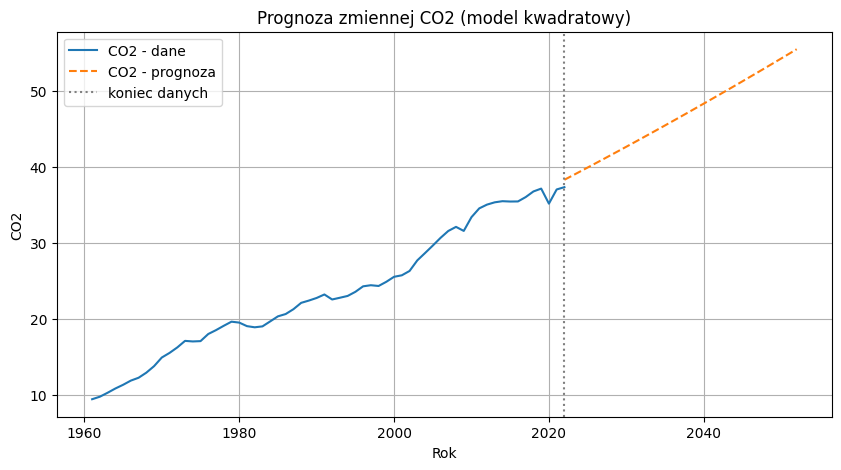

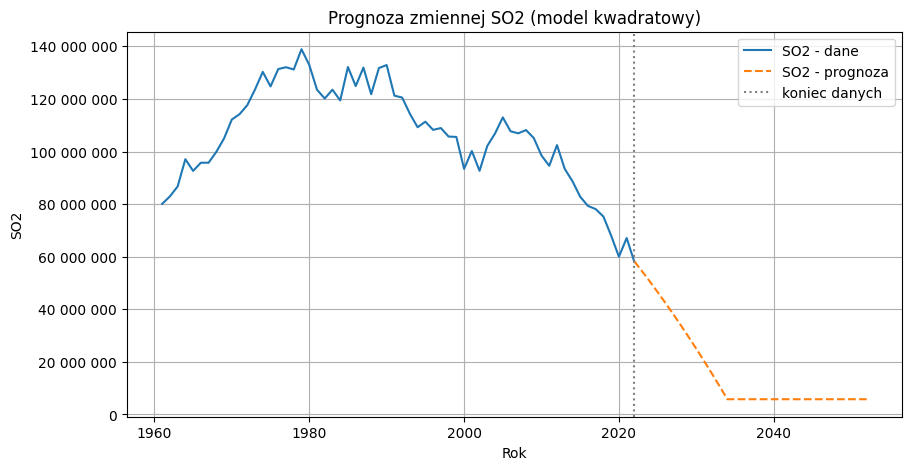

C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\354302763.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(quad, years, y)


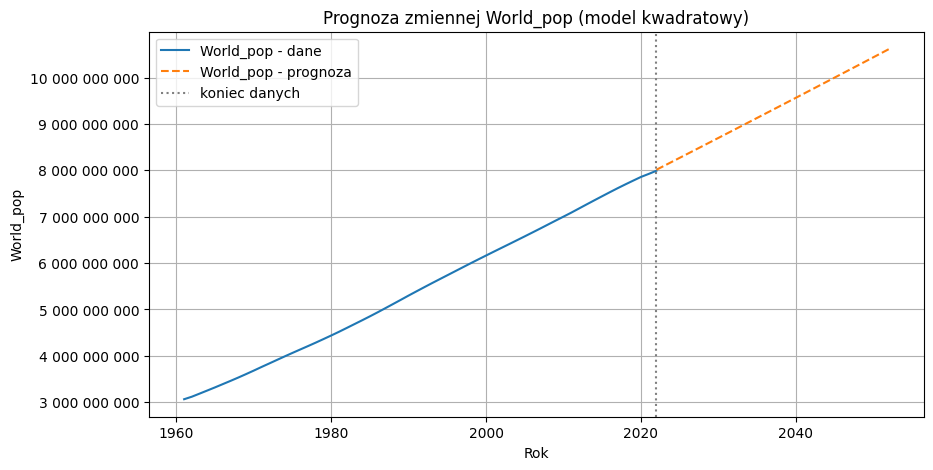

In [61]:
data_dict = {
    "CO2": data['CO2'],
    "SO2": data['SO2'],
    "World_pop": data['World_pop']
}

def quad(x, a, b, c): return a * x**2 + b * x + c

start_year = 1961
n_years = len(next(iter(data_dict.values())))
n_future_years = 30

years = np.arange(start_year, start_year + n_years)
years_future = np.arange(start_year + n_years - 1, start_year + n_years + n_future_years)

cutoff_year = 2035
cutoff_index = cutoff_year - (start_year + n_years - 1)

# prognozy
forecast_dict = {}

for name, y in data_dict.items():
    
    params, _ = curve_fit(quad, years, y)
    y_future = quad(years_future, *params)
    forecast_dict[name] = y_future
    
    if name == 'SO2':
        y_future[cutoff_index:] = y_future[cutoff_index - 1]
    
    # wykres
    plt.figure(figsize = (10, 5))
    plt.plot(years, y, label = f'{name} - dane')
    plt.plot(years_future, y_future, '--', label = f'{name} - prognoza')
    plt.axvline(x = years[-1], color = 'gray', linestyle = ':', label = 'koniec danych')
    plt.xlabel('Rok')
    plt.ylabel(name)
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
    plt.title(f'Prognoza zmiennej {name} (model kwadratowy)')
    plt.legend()
    plt.grid(True)
    plt.show()

### 3. Wykonanie predykcji GST

In [62]:
n_obs = len(y)
n_forecast = 30

X_future = pd.DataFrame({
    'CO2': forecast_dict['CO2'][:n_forecast],
    'World_pop': forecast_dict['World_pop'][:n_forecast],
    'SO2': forecast_dict['SO2'][:n_forecast]
})

y = data['GST']

model = ARIMA(endog = y, exog = X[['CO2', 'World_pop', 'SO2']], order = (1, 0, 1))
fitted = model.fit()

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\b

In [63]:
forecast_result = fitted.get_forecast(steps = n_forecast, exog = X_future)
predicted_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


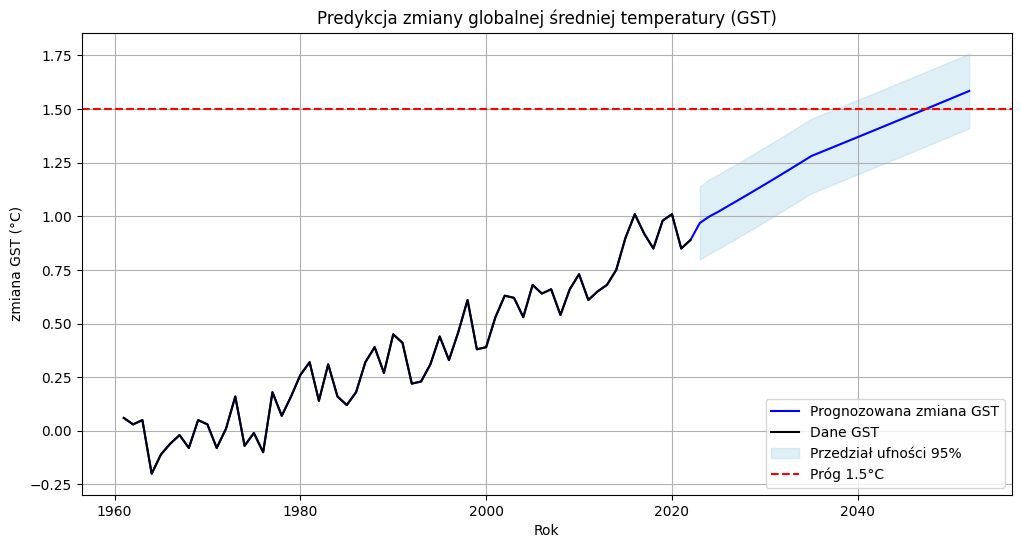

In [64]:
years_full = np.arange(start_year, start_year + n_obs + n_forecast)

full_series = np.concatenate([y, predicted_mean])
lower = np.concatenate([np.full(n_obs, np.nan), conf_int.iloc[:, 0]])
upper = np.concatenate([np.full(n_obs, np.nan), conf_int.iloc[:, 1]])

plt.figure(figsize = (12, 6))
plt.plot(years_full, full_series, label = 'Prognozowana zmiana GST', color = 'blue')
plt.plot(years[:n_obs], y, label = 'Dane GST', color = 'black')
plt.fill_between(years_full, lower, upper, color = 'lightblue', alpha = 0.4, label = 'Przedział ufności 95%')
plt.axhline(1.5, color = 'red', linestyle = '--', label = 'Próg 1.5°C')
plt.xlabel('Rok')
plt.ylabel('zmiana GST (°C)')
plt.title('Predykcja zmiany globalnej średniej temperatury (GST)')
plt.legend()
plt.grid(True)
plt.show()

### 4. Kiedy zostanie przekroczone 1.5°C?

In [65]:
crossing = np.where(full_series > 1.5)[0]
if len(crossing) > 0:
    year_crossed = years_full[crossing[0]]
    print(f'Prognozowane przekroczenie 1.5°C w roku: {year_crossed}')
else:
    print('W prognozowanym okresie nie przekroczono 1.5°C')

Prognozowane przekroczenie 1.5°C w roku: 2048


# Próba predykcji kiedy i z jakim prawdopodobieństwem średni przrost temperatury przekroczy 1.5 za 25 lat (model ARIMA(1, 0, 1) - N2O, produkcja mięsa)

1. Regresja, w celu prognozy zmiennych niezależnych
2. Prognoza zmiennych niezależnych
3. Wykonanie predykcji GST
4. Sprawdzenie, kiedy GST przekroczy 1,5 stopnia Celsjusza i oszacowanie niepewności

1. Dopasowanie modeli regresji

In [66]:
x = np.arange(1961, 1961 + len(data['N2O']))
y = data['N2O'].values

# liniowa
def lin(x, a, b): return a * x + b
param_linear, _ = curve_fit(lin, x, y)
y_lin = lin(x, *param_linear)

# wykładnicza
def expo(x, a, b, c): return a * np.exp(b * x) + c
param_exp, _ = curve_fit(expo, x, y, bounds = ([0, -np.inf, -np.inf], [np.inf, 0.1, np.inf]), maxfev = 10000)
y_exp = expo(x, *param_exp)

# kwadratowa
def quad(x, a, b, c): return a * x**2 + b * x + c
param_quad, _ = curve_fit(quad, x, y)
y_quad = quad(x, *param_quad)

# sześcienna
def cub(x, a, b, c, d): return a * x**3 + b * x**2 + c * x + d
param_cub, _ = curve_fit(cub, x, y)
y_cub = cub(x, *param_cub)

# logarytmiczna
def logarytmic(x, a, b): return a * np.log(x) + b
param_log, _ = curve_fit(logarytmic, x, y)
y_log = logarytmic(x, *param_log)

# porównanie
def por(true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, r2

print("Liniowa: ", por(y, y_lin), "\nWykładnicza: ", por(y, y_exp), "\nKwadratowa: ", por(y, y_quad), "\nSześcienna: ", por(y, y_cub), "\nLogarytmiczna: ", por(y, y_log))

# dla N2O najlepsza logarytmiczna

Liniowa:  (5918788820646035.0, 0.969077210083126) 
Wykładnicza:  (5.314914650941705e+18, -26.767841387395066) 
Kwadratowa:  (6205157951426454.0, 0.9675810707988671) 
Sześcienna:  (4.5331232217407206e+23, -2368335.1799330288) 
Logarytmiczna:  (5776177898231367.0, 0.9698222827199968)


C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\3168359231.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  param_quad, _ = curve_fit(quad, x, y)
C:\Users\s-A009-39\AppData\Local\Temp\ipykernel_7996\3168359231.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  param_cub, _ = curve_fit(cub, x, y)


In [67]:
# produkcja mięsa

x = np.arange(1961, 1961 + len(data['World_meat_production']))
y = data['World_meat_production'].values

# liniowa
def lin(x, a, b): return a * x + b
param_linear, _ = curve_fit(lin, x, y)
y_lin = lin(x, *param_linear)

# wykładnicza
def expo(x, a, b, c): return a * np.exp(b * x) + c
param_exp, _ = curve_fit(expo, x, y, bounds = ([0, -np.inf, -np.inf], [np.inf, 0.1, np.inf]), maxfev = 10000)
y_exp = expo(x, *param_exp)

# kwadratowa
def quad(x, a, b, c): return a * x**2 + b * x + c
param_quad, _ = curve_fit(quad, x, y)
y_quad = quad(x, *param_quad)

# sześcienna
def cub(x, a, b, c, d): return a * x**3 + b * x**2 + c * x + d
param_cub, _ = curve_fit(cub, x, y)
y_cub = cub(x, *param_cub)

# logarytmiczna
def logarytmic(x, a, b): return a * np.log(x) + b
param_log, _ = curve_fit(logarytmic, x, y)
y_log = logarytmic(x, *param_log)

# porównanie
def por(true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, r2

print("Liniowa: ", por(y, y_lin), "\nWykładnicza: ", por(y, y_exp), "\nKwadratowa: ", por(y, y_quad), "\nSześcienna: ", por(y, y_cub), "\nLogarytmiczna: ", por(y, y_log))

# dla N2O najlepsza kwadratowa

Liniowa:  (139957218669966.12, 0.9824208454090759) 
Wykładnicza:  (7961544345931039.0, -1.2121754711102994e-09) 
Kwadratowa:  (33077487947169.67, 0.9958453427438144) 
Sześcienna:  (1.2006777908376253e+20, -15079.96595488658) 
Logarytmiczna:  (147438828609180.94, 0.9814811269796851)


### 2. Prognoza zmiennych niezależnych

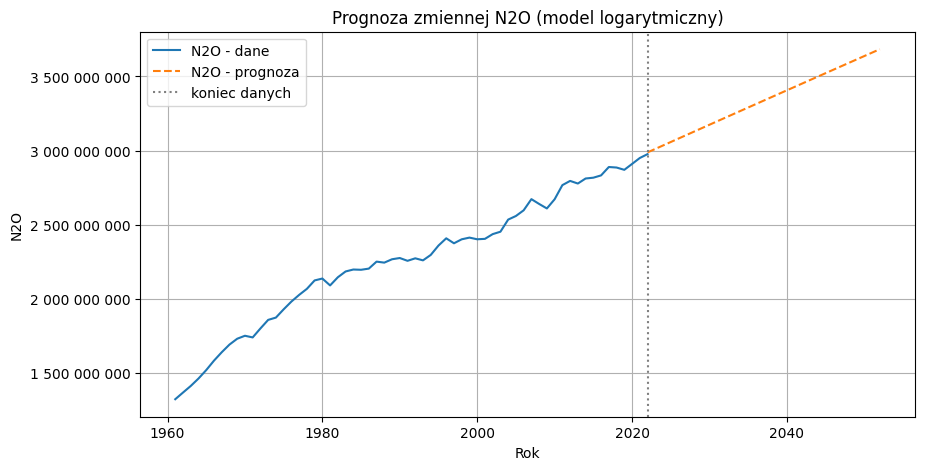

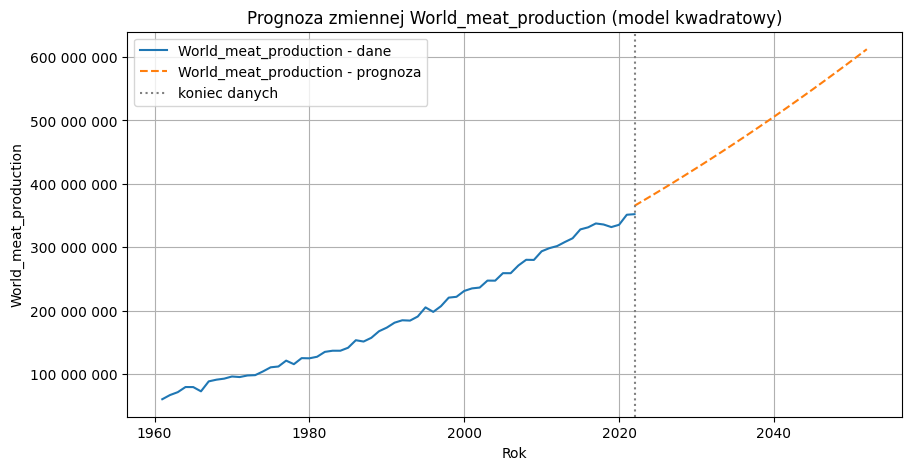

In [68]:
data_dict = {
    "N2O": data['N2O'],
    "World_meat_production": data['World_meat_production']
}

def quad(x, a, b, c): return a * x**2 + b * x + c
def log_func(x, a, b): return a * np.log(x) + b

start_year = 1961
n_years = len(next(iter(data_dict.values())))
n_future_years = 30

years = np.arange(start_year, start_year + n_years)
years_future = np.arange(start_year + n_years - 1, start_year + n_years + n_future_years)


# prognozy
forecast_dict = {}

for name, y in data_dict.items():
    
    if name == "N2O":
        x_fit = years[1:]
        y_fit = y[1:]
        params, _ = curve_fit(log_func, x_fit, y_fit)
        y_future = log_func(years_future, *params)
        label = 'logarytmiczny'
    else:
        params, _ = curve_fit(quad, years, y)
        y_future = quad(years_future, *params)
        label = 'kwadratowy'
        
    forecast_dict[name] = y_future
    
    # wykres
    plt.figure(figsize = (10, 5))
    plt.plot(years, y, label = f'{name} - dane')
    plt.plot(years_future, y_future, '--', label = f'{name} - prognoza')
    plt.axvline(x = years[-1], color = 'gray', linestyle = ':', label = 'koniec danych')
    plt.xlabel('Rok')
    plt.ylabel(name)
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
    plt.title(f'Prognoza zmiennej {name} (model {label})')
    plt.legend()
    plt.grid(True)
    plt.show()

### 3. Wykonanie predykcji GST

In [69]:
n_obs = len(y)
n_forecast = 30

X_future = pd.DataFrame({
    'N2O': forecast_dict['N2O'][:n_forecast],
    'World_meat_production': forecast_dict['World_meat_production'][:n_forecast]
})

y = data['GST']

model = ARIMA(endog = y, exog = X[['N2O', 'World_meat_production']], order = (1, 0, 1))
fitted = model.fit()

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\b

In [70]:
forecast_result = fitted.get_forecast(steps = n_forecast, exog = X_future)
predicted_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\s-A009-39\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


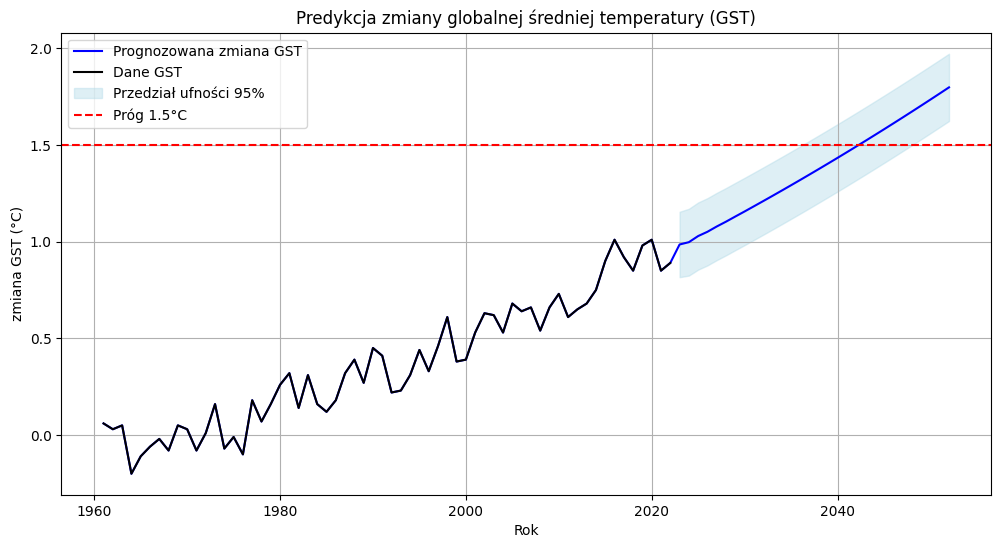

In [71]:
years_full = np.arange(start_year, start_year + n_obs + n_forecast)

full_series = np.concatenate([y, predicted_mean])
lower = np.concatenate([np.full(n_obs, np.nan), conf_int.iloc[:, 0]])
upper = np.concatenate([np.full(n_obs, np.nan), conf_int.iloc[:, 1]])

plt.figure(figsize = (12, 6))
plt.plot(years_full, full_series, label = 'Prognozowana zmiana GST', color = 'blue')
plt.plot(years[:n_obs], y, label = 'Dane GST', color = 'black')
plt.fill_between(years_full, lower, upper, color = 'lightblue', alpha = 0.4, label = 'Przedział ufności 95%')
plt.axhline(1.5, color = 'red', linestyle = '--', label = 'Próg 1.5°C')
plt.xlabel('Rok')
plt.ylabel('zmiana GST (°C)')
plt.title('Predykcja zmiany globalnej średniej temperatury (GST)')
plt.legend()
plt.grid(True)
plt.show()

### 4. Kiedy zostanie przekroczone 1.5°C?

In [72]:
crossing = np.where(full_series > 1.5)[0]
if len(crossing) > 0:
    year_crossed = years_full[crossing[0]]
    print(f'Prognozowane przekroczenie 1.5°C w roku: {year_crossed}')
else:
    print('W prognozowanym okresie nie przekroczono 1.5°C')

Prognozowane przekroczenie 1.5°C w roku: 2043


# Wnioski

- Różnica w prognozie przekroczenia progu 1.5°C między modelami wynosi 5 lat (2043 vs 2048), co jest istotne w kontekście planowania polityki klimatycznej i strategii adaptacyjnych.
- Model 1 oferuje bardziej konserwatywny (opóźniony) scenariusz, ale jego konstrukcja oparta jest na klasycznych zmiennych, które mogą nie oddawać pełnej złożoności systemu klimatycznego.
- Model 2, choć nieco słabszy pod względem dopasowania ogólnego, uwzględnia dynamiczne czynniki rolnicze i może odzwierciedlać alternatywną ścieżkę rozwoju temperatury, silniej zależną od sektora żywnościowego.
- Użycie modelu 1 jako bazowego oraz modelu 2 jako wariantu alternatywnego pozwala uchwycić szersze spektrum możliwych trajektorii zmian klimatycznych, co jest zgodne z podejściem wielomodelowym zalecanym m.in. przez IPCC.